# 1.1 Обычное разделение данных на обучающую и тестовую выборки

In [74]:
# Проблемы при простом разбиении данных на обучающую и тестовую выборки

# Однобокая проверка: 
# Разовое разбиение на обучающую и тестовую выборки может привести к тому, 
# что модель будет проверена на одном и том же наборе данных, что может не отражать её истинную производительность 
# на новых, не известных ей данных. Таким образом, результаты могут быть случайными и не всегда репрезентативными.

# Повезёт/не повезёт: 
# Результаты оценки модели зависят от конкретного разбиения данных. 
# Если данные случайно разбиваются на неудачные обучающие и тестовые выборки, это может значительно исказить оценку модели, 
# приводя к переоценке или недооценке её производительности.

# Мало данных - мало толку: 
# При малом объеме данных train_test_split может оставить слишком мало данных для обучения или тестирования, 
# что снижает достоверность результатов. В таких случаях может быть сложно оценить истинное качество модели.

# Неравномерное распределение: 
# При разовом разбиении данные могут быть распределены неравномерно, особенно если выборка небольшая, 
# что может привести к несбалансированности классов или признаков в обучающих и тестовых наборах.

In [75]:
# Для примера возьмём достаточно известный в среде аналитиков и датасаентистов набор данных о цветках ириса. 
# Этот набор данных включен в модуль datasets библиотеки scikit-learn.

from sklearn.datasets import load_iris
import pandas as pd

# Загрузка данных
iris = load_iris()

# Создание DataFrame из данных и добавление меток классов
df = pd.DataFrame(data=iris.data, columns=iris.feature_names)

# Добавление столбца с метками классов
df['target'] = iris.target

# Просмотр первых строк DataFrame
display(df.head())

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [76]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   target             150 non-null    int32  
dtypes: float64(4), int32(1)
memory usage: 5.4 KB


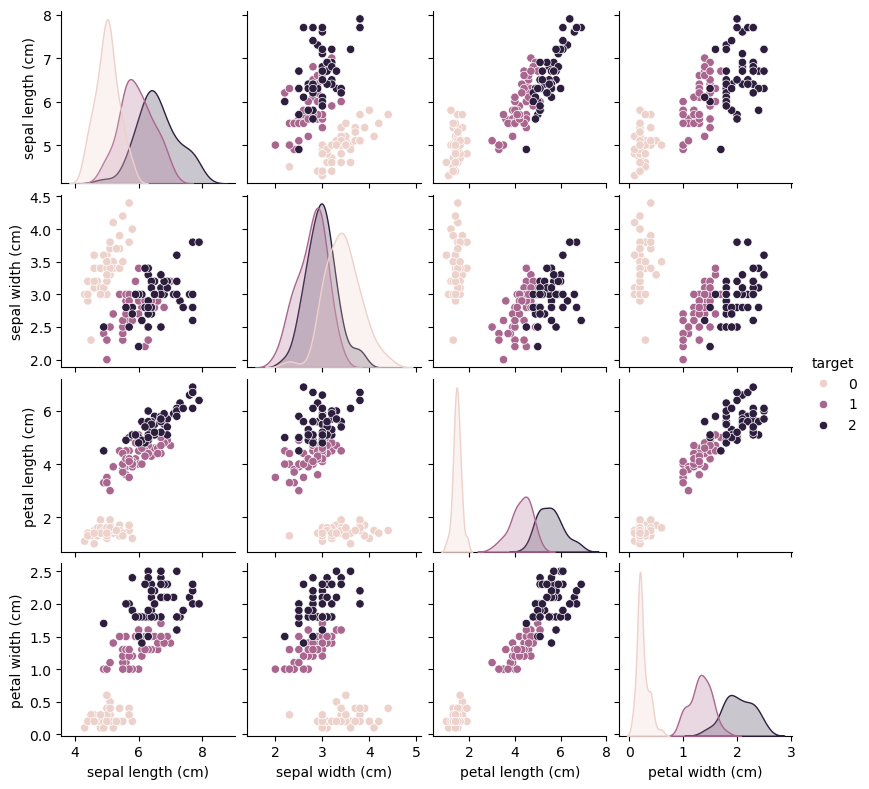

In [77]:
# Посмотрим также на визуальное распределение данных:

import matplotlib.pyplot as plt
import seaborn as sns

sns.pairplot(data=df, hue='target', height=2)
plt.show();

In [78]:
# Датасет 'iris' как раз-таки может продемонстрировать проблемы, возникающие при стандартном разбиении.

# Посмотрим на распределение данных в этом датасете в колонке 'target':

df['target'].value_counts()

target
0    50
1    50
2    50
Name: count, dtype: int64

In [79]:
# Особенность этого датасета в том, что он имеет равное количество значений каждого класса. 
# Причём данные распределены по порядку: 
# сначала представлены все цветки вида 'setosa', за ними следуют 'versicolor', а завершает набор 'virginica'.

# Давайте сделаем разбиение данных на обучающую и тестовые выборки без перемешивания данных shuffle=False:

from sklearn.model_selection import train_test_split

X = df.drop('target', axis=1)
y = df['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, shuffle=False)

In [80]:
# Посмотрим на распределение целевой переменной в полученных выборках:

print(y_train.values)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2]


In [81]:
print(y_test.values)

[2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2]


In [82]:
# Как мы можем заметить, в обучающей выборке у нас мало представителей вида 'virginica' (2), 
# а тестовая выборка, наоборот, полностью состоит из цветков этого вида.

# Теперь сделаем обучение модели логистической регрессии и посмотрим на результат:

from sklearn.linear_model import LogisticRegression

model_lr = LogisticRegression(max_iter=200)
model_lr.fit(X_train, y_train)
print('Правильность предсказаний на тестовом наборе: {:.2f}'.format(model_lr.score(X_test, y_test)))

Правильность предсказаний на тестовом наборе: 0.76


In [83]:
# Понятно, что в данном случае мы бы использовали функцию train_test_split() с перемешиванием данных shuffle=True. 
# Если сделаем разбиение на обучающие и тестовые выборки с перемешиванием (что применено в функции train_test_split() по умолчанию) 
# и посмотрим на качество предсказаний модели логистической регрессии, то получим более качественно обученную модель:

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=12345)

model_lr = LogisticRegression(max_iter=200)

model_lr.fit(X_train, y_train)

print('Правильность предсказаний на тестовом наборе: {:.2f}'.format(model_lr.score(X_test, y_test)))

Правильность предсказаний на тестовом наборе: 0.97


In [84]:
# Однако перемешивание данных не устраняет всех потенциальных проблем, связанных с разбиением выборок. 
# В наборе данных про ирисы присутствуют три класса цветков в определённой пропорции, 
# и простое перемешивание данных при их разбиении не гарантирует нам, 
# что в тренировочной и тестовой выборках будут соблюдены эти пропорции.

In [85]:
# В функции train_test_split() проблема соблюдения пропорций классов
# при делении данных на обучающие и тестовые выборки решается при помощи параметра stratify. 
# Применим этот параметр для нашего примера и посмотрим на качество предсказаний модели логистической регрессии:

X_train, X_test, y_train, y_test = train_test_split(X, y, shuffle=True, random_state=12345, stratify=y)

model_lr = LogisticRegression(max_iter=200)

model_lr.fit(X_train, y_train)

print('Правильность предсказаний на тестовом наборе: {:.2f}'.format(model_lr.score(X_test, y_test)))

Правильность предсказаний на тестовом наборе: 1.00


In [86]:
# На первый взгляд, результат кажется впечатляющим - 100 процентная точность предсказаний. 
# Однако, если мы изменим значение параметра random_state, 
# отвечающего за воспроизводимость результата, на другое число, то получим:

X_train, X_test, y_train, y_test = train_test_split(X, y, shuffle=True, random_state=42, stratify=y)

model_lr = LogisticRegression(max_iter=200)

model_lr.fit(X_train, y_train)

print('Правильность предсказаний на тестовом наборе: {:.2f}'.format(model_lr.score(X_test, y_test)))

# Оценка качества модели у нас сильно "гуляет" от случая к случаю.

Правильность предсказаний на тестовом наборе: 0.95


In [87]:
# Давайте взглянем еще раз на график распределения данных в датасете 'iris'. 
# Как можем заметить, цветки вида 'setosa' (0) достаточно хорошо отделяются от двух других видов. 
# А вот с цветками видов 'versicolor' (1) и 'virginica' (2) не всё так однозначно.  
# Часть образцов хорошо отделяются друг от друга, но некоторые образцы находятся в зоне пересечения двух видов и достаточно сложно идентифицируются.

# А теперь представьте, что, например, при разделении данных сложно идентифицируемые образцы попадут преимущественно в обучающую выборку, 
# а легко идентифицируемые - в тестовую. В этом случае модели будет сложно качественно обучиться, и мы получим недообученную модель.

# И здесь мы нащупываем "потолок" возможностей применения функции train_test_split().

# 1.1 Перекрёстная проверка (cross-validation)

In [88]:
# Перекрёстная проверка (cross-validation)

# Перекрёстная проверка - это статистический метод оценки обобщающей способности моделей, 
# который отличается большей устойчивостью и надёжностью по сравнению с обычным разбиением данных на обучающие и тестовые выборки. 
# В этом подходе данные делятся на несколько частей, и строится несколько моделей, что позволяет более точно оценить их производительность.

In [89]:
# Наиболее популярной разновидностью перекрёстной проверки является k-блочная кросс-валидация (k-fold cross-validation), 
# где k - это заданное пользователем количество блоков.

# Например, при использовании пятиблочной перекрёстной проверки, данные разбиваются на пять примерно равных по размеру частей, называемых блоками (folds).

# Далее поочерёдно строятся модели: 
# первая модель обучается на четырёх блоках 2-5, а первый блок используется как тестовый набор. 
# На данных из блока 1 оценивается точность модели, обученной на блоках 2-5.

# Затем строится вторая модель, где блок 2 выступает тестовым, а блоки 1, 3, 4 и 5 - обучающими. 

# Этот процесс повторяется, пока каждый блок не окажется в роли тестового набора. 

# В итоге, после пяти таких разбиений (splits) мы получаем пять значений точности модели. 
# Эти значения дают более полное представление о её способности обобщать на новых данных.

# Процесс пятиблочной кросс-валидации наглядно представлен ниже, где показано, как каждый из блоков поочерёдно выполняет роль тестовой выборки, а оставшиеся блоки - обучающих.

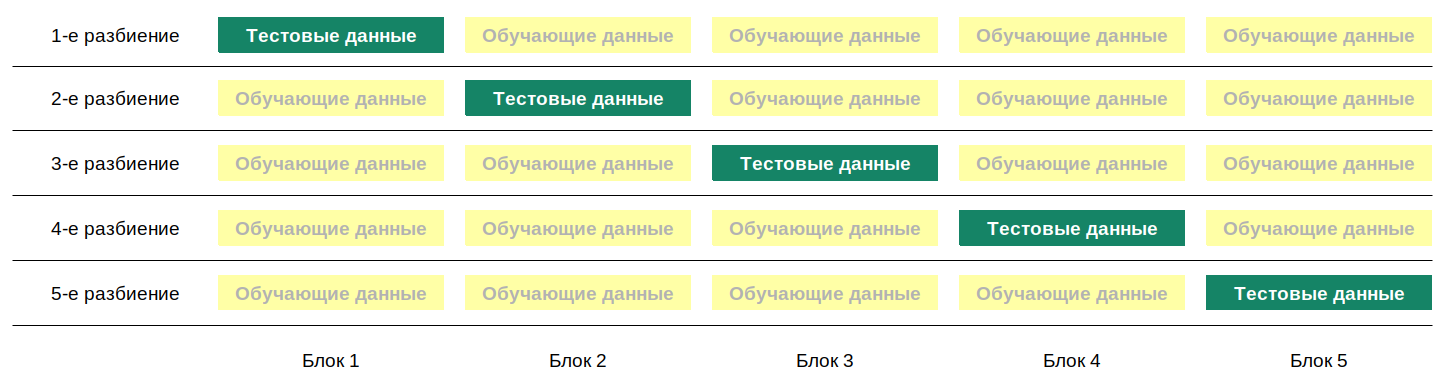

# 1.2 cross_val_score()

In [90]:
# В библиотеке scikit-learn перекрёстная проверка реализуется при помощи функции cross_val_score() из модуля model_selection. 
# Основными аргументами этой функции выступают модель для оценки, обучающие данные и истинные метки.

# Чтобы можно было использовать функцию cross_val_score(), её сначала нужно импортировать следующей командой:

# from sklearn.model_selection import cross_val_score

In [91]:
display(df.tail())

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2
149,5.9,3.0,5.1,1.8,2


In [92]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score


X = df.drop('target', axis=1)
y = df['target']

model_lr = LogisticRegression(max_iter=200)
scores = cross_val_score(model_lr, X, y)

print("Значения правильности предсказаний перекрёстной проверки: {}".format(scores))

# По умолчанию cross_val_score() выполняет пятиблочную кросс-валидацию, 
# возвращая пять значений правильности проверки. 

Значения правильности предсказаний перекрёстной проверки: [0.96666667 1.         0.93333333 0.96666667 1.        ]


In [93]:
# За изменение количества блоков перекрёстной проверки в функции cross_val_score() отвечает параметр cv. 
# Например, увеличим количество блоков до 10:

model_lr = LogisticRegression(max_iter=200)
scores = cross_val_score(model_lr, X, y, cv=10)

print("Значения правильности предсказаний перекрёстной проверки: {}".format(scores))

Значения правильности предсказаний перекрёстной проверки: [1.         0.93333333 1.         1.         0.93333333 0.93333333
 0.93333333 1.         1.         1.        ]


In [94]:
# Наиболее распространённым способом подвести итог точности, полученной в ходе кросс-валидации, является расчет среднего значения:

print("Средняя оценка качества моделей: {:.2f}".format(scores.mean()))

Средняя оценка качества моделей: 0.97


In [95]:
# В нашем примере средняя правильность, рассчитанная по результатам кросс-валидации, указывает, 
# что модель в среднем достигает около 97% правильности.

# Однако, посмотрев на все десять значений правильности, выявленных в процессе десятиблочной кросс-валидации, 
# можно заметить некоторый разброс результатов: от 93% до 100%. 
# Это может свидетельствовать о том, что модель значительно зависит от конкретных блоков данных, 
# использованных для обучения, либо же такой разброс обусловлен небольшим объемом набора данных, 
# что затрудняет её способность к обобщению результатов.

In [96]:
model_lr = LogisticRegression(max_iter=200)
scores = cross_val_score(model_lr, X, y, cv=3)

print("Значения правильности предсказаний перекрёстной проверки: {}".format(scores))

# Дело в том, что по умолчанию cross_val_score() выполняет обычную перекрёстную проверку (KFold) без стратификации. 
# Однако, если выполняется задача классификатором (задача классификации), и метки классов предоставлены, 
# то вместо обычного разбиения используется стратифицированная кросс-валидация (StratifiedKFold).

# В стратифицированной перекрёстной проверке данные разбиваются таким образом, 
# чтобы пропорции классов в каждом блоке в точности соответствовали пропорциям классов в наборе данных. 
# Демонстрация стандартной и стратифицированной перекрёстных проверок схематично показана ниже

Значения правильности предсказаний перекрёстной проверки: [0.98 0.96 0.98]


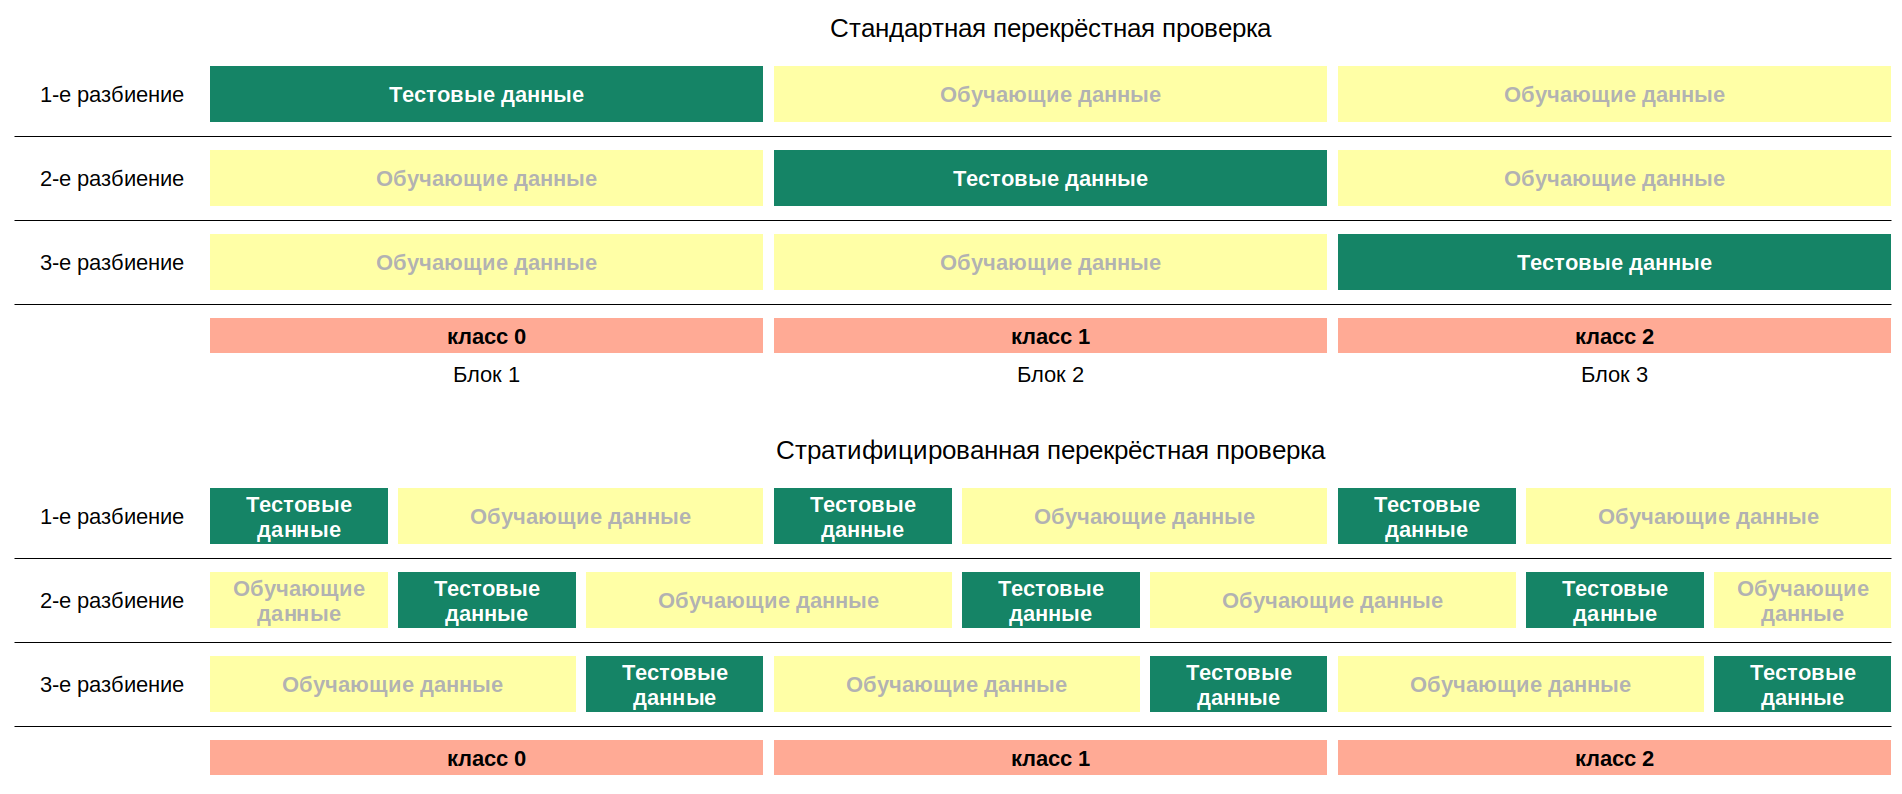

In [97]:
# Например, если 80% примеров относятся к классу А, а оставшиеся 20% - к классу В, 
# то при стратифицированной кросс-валидации каждый блок будет сформирован так, 
# чтобы сохранять те же пропорции: 80% примеров класса А и 20% - класса В.

In [98]:
# Если мы в нашем примере принудительно укажем, чтобы при проведении перекрёстной проверки использовалась k-fold кросс-валидация, 
# то тогда, из-за "особенностей" датасета 'iris', мы получим нулевые значения правильности моделей:

from sklearn.model_selection import KFold

cv = KFold(n_splits=3)
model_lr = LogisticRegression(max_iter=200)
scores = cross_val_score(model_lr, X, y, cv=cv)

print("Значения правильности предсказаний перекрёстной проверки: {}".format(scores))

Значения правильности предсказаний перекрёстной проверки: [0. 0. 0.]


## Параметр verbose функции cross_val_score()

In [99]:
# Параметр verbose в функции cross_val_score() используется для управления уровнем детализации вывода информации 
# о процессе выполнения перекрёстной проверки.
 
# Он помогает отслеживать прогресс выполнения, особенно при работе с большими данными 
# или при использовании сложных моделей, где время вычислений может быть значительным.

# Параметр verbose принимает целочисленные значения. 
# По умолчанию verbose=0, - при этом никакая информация о ходе выполнения кросс-валидации не выводится.

# verbose > 0 - увеличивает уровень детализации вывода. 
# Чем больше значение, тем больше информации выводится, например, 
# может отображаться прогресс по каждой итерации, по каждому подмножеству данных и так далее.

In [100]:
display(df.tail())

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2
149,5.9,3.0,5.1,1.8,2


In [101]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score

X = df.drop('target', axis=1)
y = df['target']

model_lr = LogisticRegression(max_iter=200)
scores = cross_val_score(model_lr, X, y, verbose=2)

[CV] END .................................................... total time=   0.0s
[CV] END .................................................... total time=   0.0s
[CV] END .................................................... total time=   0.0s
[CV] END .................................................... total time=   0.0s
[CV] END .................................................... total time=   0.0s


In [102]:
model_lr = LogisticRegression(max_iter=200)
scores = cross_val_score(model_lr, X, y, verbose=3)

[CV] END ................................ score: (test=0.967) total time=   0.0s
[CV] END ................................ score: (test=1.000) total time=   0.0s
[CV] END ................................ score: (test=0.933) total time=   0.0s
[CV] END ................................ score: (test=0.967) total time=   0.0s
[CV] END ................................ score: (test=1.000) total time=   0.0s


In [103]:
# Так как датасет по объёму данных маленький, то время выполнения итераций близко к нулю в секундах.

# Использование параметра verbose становится особенно ценным при длительных вычислениях, 
# поскольку оно позволяет наблюдать за ходом процесса, предоставляя уверенность в его исполнении и возможность отслеживать прогресс. 
# Это не только облегчает отладку, но и даёт более глубокое понимание производительности модели на каждом этапе кросс-валидации.

## Параметр scoring функции cross_val_score()

In [104]:
# Параметр scoring в функции cross_val_score() определяет, какую метрику оценки будет использовать функция 
# для измерения производительности модели на каждом шаге кросс-валидации. 

# Этот параметр позволяет гибко адаптировать оценку модели в зависимости от типа задачи 
# (классификация, регрессия и др.) и специфических требований к оценке.

In [105]:
# Значения, которые может принимать параметр scoring:

# Строка (имя метрики): 
# Используется одно из стандартных имен метрик, поддерживаемых scikit-learn, 
# например, 'accuracy', 'precision', 'recall', 'f1' для классификации, и 
# 'r2', 'neg_mean_squared_error' для регрессии.

# Функция: 
# Можно передать свою собственную функцию оценки, которая принимает два аргумента: 
# истинные значения и предсказанные значения, и возвращает оценку.

# Объект scorer из библиотеки scikit-learn: 
# Можно передать заранее созданный объект оценщика (scorer), используя функцию make_scorer().

In [106]:
# По умолчанию, для задач классификации используется метрика 'accuracy', 
# а для задач регрессии - метрика 'r2'.

In [107]:
# Также можно использовать метрики, которые начинаются с 'neg_' (например, 'neg_mean_squared_error').

In [108]:
# Давайте сделаем отступление и поговорим почему neg_?

# В машинном обучении метрики обычно делятся на те, которые нужно максимизировать (например, точность, F1-score) 
# и те, которые нужно минимизировать (например, ошибки - Mean Squared Error (MSE), Mean Absolute Error (MAE)).

# Метрики ошибок, такие как MSE (среднеквадратическая ошибка), нужно минимизировать, 
# так как они измеряют насколько предсказания модели отличаются от истинных значений.

# У кросс-валидации с функцией cross_val_score(), наоборот, цель - максимизировать метрику. 
# Это означает, что чем выше значение метрики, тем лучше считается модель.

# Соответственно, при кросс-валидации для метрик ошибок необходимо превратить задачу минимизации в задачу максимизации. 
# Чтобы кросс-валидация могла использовать метрики ошибок, в scikit-learn введены отрицательные версии метрик ошибок. 

# Метрики с 'neg_', такие как 'neg_mean_squared_error', просто берут метрику ошибки и делают её отрицательной. 
# Например, если MSE = 5, то 'neg_mean_squared_error' будет -5.

# Когда мы используем 'neg_mean_squared_error', функция кросс-валидации будет пытаться максимизировать это отрицательное значение. 
# Максимизация значения -5 (вместо -10) эквивалентна минимизации MSE (5 вместо 10). 
# Таким образом, мы достигаем нужного эффекта минимизации ошибки, но через максимизацию отрицательного значения.

In [109]:
# Для примера, при помощи функции make_regression() модуля sklearn.datasets 
# создадим синтетический набор данных следующим образом:

from sklearn.datasets import make_regression

# Генерируем набор данных для регрессии со 100 образцами и 2 признаками
X, y = make_regression(n_samples=100, n_features=2, noise=10, random_state=12345)

In [110]:
# Функция make_regression() библиотеки scikit-learn используется для генерации синтетических данных для задач регрессии.

# Вот что происходит в этом коде:

# n_samples=100: Генерируется 100 образцов данных (строк). 
# Это количество наблюдений в наборе данных.

# n_features=2: Каждый образец будет иметь 2 признака (столбца). 
# Это количество независимых переменных или входных параметров для регрессии.

# noise=10: Добавляется случайный шум с дисперсией (ошибкой) 10 к данным, чтобы сделать задачу более реалистичной. 
# Это моделирует наличие ошибок измерений или других источников неопределённости в реальных данных.

# random_state=12345: Устанавливает начальное значение генератора случайных чисел 
# для обеспечения воспроизводимости результатов, - при каждом запуске кода будут генерироваться одинаковые данные.

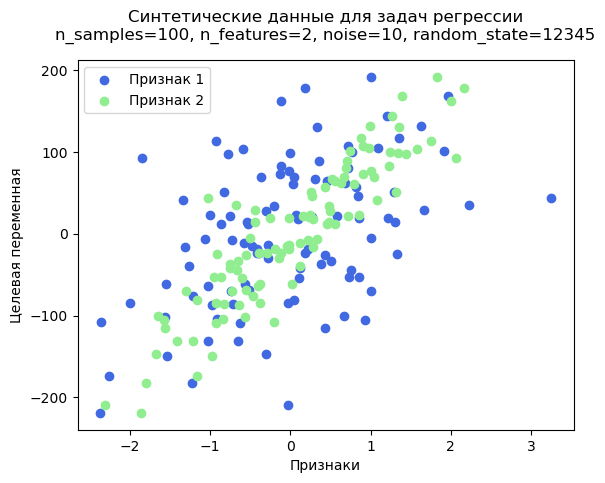

In [111]:
# Графически отобразим получившееся распределение данных при помощи библиотеки matplotlib:

import matplotlib.pyplot as plt

plt.scatter(X[:, 0], y, color='royalblue', label='Признак 1')
plt.scatter(X[:, 1], y, color='lightgreen', label='Признак 2')
plt.xlabel('Признаки')
plt.ylabel('Целевая переменная')
plt.title('Синтетические данные для задач регрессии\nn_samples=100, n_features=2, noise=10, random_state=12345',
           pad=15)
plt.legend()
plt.show();

In [112]:
# Теперь посмотрим, какими окажутся значения среднеквадратической ошибки для модели линейной регрессии:

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score

# Инициализируем модель
model = LinearRegression()

# Используем отрицательную среднеквадратическую ошибку
scores = cross_val_score(model, X, y, scoring='neg_mean_squared_error', cv=5)

print(scores)

# Как и ожидалось, модель выдала отрицательные значения MSE.

[-111.47893199 -115.17200867 -120.40186459  -84.24207792  -77.90679052]


In [113]:
# Итак, параметр scoring позволяет гибко настраивать процесс кросс-валидации под конкретные требования к оценке модели, 
# делая её результаты более интерпретируемыми и соответствующими целям анализа.

## Параметр n_jobs функции cross_val_score()

In [114]:
# Параметр n_jobs функции cross_val_score() определяет количество параллельных процессов (или потоков), 
# которые будут использоваться для выполнения перекрёстной проверки. 
# Этот параметр позволяет ускорить вычисления, распределяя работу по нескольким ядрам процессора.

In [115]:
# Значения параметра n_jobs:

# n_jobs=1 или None (по умолчанию): 
# Кросс-валидация выполняется последовательно, то есть все итерации обрабатываются поочерёдно одним процессом. 
# Это минимальная нагрузка на систему, но также и самый медленный вариант.

# n_jobs=-1: 
# Используются все доступные процессоры, их ядра и потоки на вашем компьютере. 
# Это максимизирует производительность за счёт полной загрузки всех ядер процессора, 
# что обычно значительно ускоряет выполнение задачи, особенно для больших наборов данных или моделей с долгим временем обучения.

# n_jobs=<положительное целое число>: 
# Указывает точное количество процессов, которые будут задействованы. 
# Например, n_jobs=2 задействует два процесса независимо от того, сколько ядер доступно в системе. 
# Это может быть полезно для частичного увеличения производительности, чтобы не перегружать систему полностью.

In [116]:
# Для того, чтобы узнать количество ядер на вашем компьютере, вы можете воспользоваться функцией os.cpu_count():

import os

print(os.cpu_count())

# В современных процессорах, помимо физических ядер, существуют логические ядра, благодаря технологии многопоточности. 
# Поэтому os.cpu_count() обычно возвращает количество логических ядер, а не физических.

6


In [117]:
# Параллелизация может быть востребованной в самых разных моделях и задачах машинного обучения. Приведём несколько примеров:

# Ансамблевые методы:
# Random Forest: Параллелизация помогает обучать деревья независимо друг от друга.
# Gradient Boosting (например, XGBoost, LightGBM): Использует параллелизацию для ускорения построения деревьев или других базовых моделей.

# Нейронные сети и глубокое обучение:
# Обучение нейронных сетей: 
# Параллелизация используется для обработки больших батчей данных, распределения вычислений по графическим процессорам (GPU) или нескольким CPU.

# Регрессионные и классификационные модели:
# Support Vector Machines (SVM): Когда данные большие, параллелизация ускоряет обучение модели.
# k-Nearest Neighbors (kNN): Параллельная обработка помогает при вычислении расстояний между образцами, особенно для больших наборов данных.

# Обработка и обучение на больших данных:
# Clustering (например, K-Means): Параллельные расчеты центроидов на каждом шаге.
# Dimensionality Reduction (например, PCA, t-SNE): Для обработки высокоразмерных данных.

# Гиперпараметрическая оптимизация:
# GridSearchCV и RandomizedSearchCV: Параллелизация позволяет тестировать множество комбинаций гиперпараметров одновременно, существенно ускоряя процесс подбора.

In [118]:
# Давайте посмотрим на эффект от параллелизации при кросс-валидации на примере модели дерева решений. 

# Для начала создадим набор данных при помощи функции make_classification(). 
# Эта функция позволяет создать синтетический набор данных для задачи классификации с контролируемыми параметрами, 
# такими как количество признаков, классов, информативных признаков и т. д.

from sklearn.datasets import make_classification

# Генерация данных
X, y = make_classification(n_samples=500_000, n_features=4, n_informative=3,
                           n_redundant=0, n_classes=2, random_state=12345)

In [119]:
# Вот что происходит в этом коде:

# n_samples=500_000: Количество образцов в датасете.

# n_features=4: Общее количество признаков, доступных для модели.

# n_informative=3: Количество признаков, которые действительно влияют на целевую переменную (классы).

# n_redundant=0: Означает, что среди сгенерированных признаков нет линейно-зависимых признаков, 
# то есть все признаки будут независимыми друг от друга и не будут являться комбинациями других признаков.

# n_classes=2: Датасет будет состоять из двух классов, что подходит для бинарной классификации.

# random_state=12345: Фиксирует генератор случайных чисел для воспроизводимости.

In [120]:
# Посмотрим на размеры полученных датасетов:

print(X.shape, y.shape, sep='\n\n')

(500000, 4)

(500000,)


In [121]:
# Итак, запустим процесс перекрёстной проверки с последовательным выполнением итераций:

from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier

# Инициализация модели дерева решений
# model_dtc = DecisionTreeClassifier(random_state=12345)
# scores = cross_val_score(model_dtc, X, y, cv=5, verbose=2)

# print(scores)

# Время выполнения 25.9s

In [122]:
# Теперь эту же задачу выполним со всеми доступными ядрами (n_jobs=-1):

model_dtc = DecisionTreeClassifier(random_state=12345)
scores = cross_val_score(model_dtc, X, y, cv=5, verbose=2, n_jobs=-1)

print(scores)

# Время выполнения 7.7s

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=-1)]: Done   3 out of   5 | elapsed:    6.0s remaining:    3.9s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    6.1s finished


[0.93917 0.93991 0.93973 0.93993 0.94074]


In [123]:
# Когда время перекрёстной проверки занимает секунды, то возможно несколько секунд не играют большой роли, 
# но если кросс-валидация длится несколько десятков минут или несколько часов, 
# то важность применения параметра n_jobs существенно возрастает.

# 1.3 cross_validate()

In [ ]:
# Функция cross_validate() библиотеки scikit-learn является расширенной версией функции cross_val_score() 
# и имеет дополнительные возможности, что позволяет не только оценивать метрики, 
# но и возвращать дополнительные данные, такие как время обучения и оценки на обучающей выборке.

In [ ]:
# Основные отличия между этими функциями:

# 1. Количество метрик
# cross_val_score: Работает только с одной метрикой. Она возвращает массив оценок (например, точности) для каждой итерации перекрёстной проверки.
# cross_validate: Поддерживает работу с несколькими метриками одновременно. Можно передать список метрик, и функция вернёт словарь с оценками для каждой метрики.

# 2. Возвращаемые значения
# cross_val_score: Возвращает массив оценок модели на тестовых наборах для каждой итерации перекрёстной проверки.
# cross_validate: Возвращает более подробный результат в виде словаря, который может включать:
# Оценки на тестовых (валидационных) наборах (test_score).
# Оценки на обучающих наборах (train_score), если параметр return_train_score=True.
# Время, затраченное на обучение (fit_time).
# Время, затраченное на оценку (score_time).
# Сами обученные модели (estimator), если return_estimator=True.
# Индексы обучающих и тестовых наборов для каждого разбиения (indices), если return_indices=True.

# 3. Возможность возврата оценок на обучающих наборах
# cross_val_score: Не возвращает оценки на обучающих наборах.
# cross_validate: Возвращает оценки на обучающих наборах, если установлен параметр return_train_score=True.

In [ ]:
# Параметры функции cross_validate():

# estimator: Модель, которую необходимо обучить и оценить.

# X: Данные, используемые для обучения модели.

# y: Целевая переменная для задач обучения с учителем.

# groups: Групповые метки, используемые при разбиении набора данных на обучающие и тестовые выборки. 
# Применяется, если используется групповая стратегия перекрёстной проверки, например GroupKFold.

# scoring: Стратегия для оценки производительности модели. 
# Может быть строкой, представляющей метрику, функцией, которая возвращает метрику, или набором метрик.

# cv: Определяет стратегию разбиения данных для перекрёстной проверки.

# n_jobs: Количество задач, которые будут выполняться параллельно. 
# Значение -1 указывает использование всех доступных процессоров (по умолчанию n_jobs=None).

# verbose: Уровень подробности выводимой информации (по умолчанию verbose=0).

# fit_params или params: Параметры, передаваемые в метод fit оценщика (по умолчанию fit_params=None).

# pre_dispatch: Контролирует количество задач, которые запускаются параллельно. 
# Это может быть целое число или выражение, зависящее от n_jobs (по умолчанию pre_dispatch='2*n_jobs').

# return_train_score: Указывает, нужно ли возвращать оценки на обучающей выборке. 
# Полезно для анализа переобучения, но увеличивает вычислительную нагрузку (по умолчанию return_train_score=False).

# return_estimator: Указывает, нужно ли возвращать экземпляры оценивателей, обученные на каждом разбиении (по умолчанию return_estimator=False).

# return_indices: Указывает, нужно ли возвращать индексы обучающих и тестовых выборок для каждого разбиения (по умолчанию return_indices=False).

# error_score: 'raise' или числовое значение, по умолчанию=np.nan. Значение, присваиваемое оценке в случае ошибки при обучении. 
# Если установлено в 'raise', то при возникновении ошибки выполнение кода будет прервано.

In [125]:
# Перед использованием функции cross_validate(), её импортируют следующей командой:

from sklearn.model_selection import cross_validate

In [124]:
from sklearn.datasets import load_iris

iris = load_iris()
X = iris.data
y = iris.target

In [127]:
# Теперь при помощи функции cross_validate() оценим работу модели случайного леса со 100 деревьями решений (n_estimators=100):

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_validate

rf = RandomForestClassifier(n_estimators=100, random_state=12345)

cv_results_rf = cross_validate(rf, X, y)

display(cv_results_rf)

{'fit_time': array([0.10557461, 0.10212326, 0.10575008, 0.10232782, 0.1003561 ]),
 'score_time': array([0.0040431 , 0.00421524, 0.00509644, 0.00421047, 0.00400066]),
 'test_score': array([0.96666667, 0.96666667, 0.93333333, 0.96666667, 1.        ])}

In [128]:
# Создадим пользовательскую функция для более аккуратного вывода информации:

def print_results(dic, name):
    print(f'{name}:')        # Печатаем наименование модели
    for key, values in dic.items():
        print(key)           # Печатаем ключ словаря
        print(values)        # Печатаем значения этого ключа
        print()

In [ ]:
# Применим эту функцию для распечатывания результатов перекрёстной проверки:

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_validate

rf = RandomForestClassifier(n_estimators=100, random_state=12345)

cv_results_rf = cross_validate(rf, X, y)

print_results(cv_results_rf, 'Random Forest')

# С параметрами по умолчанию производится 5-блочная кросс-валидация, 
# и функция cross_validate() возвращает значения времени, затраченного на обучение (fit_time) 
# и оценку каждого блока (score_time), а также оценки правильности моделей на тестовых наборах (test_score).

Random Forest:
fit_time
[0.10425258 0.10623455 0.10429549 0.10782123 0.10518098]

score_time
[0.00400233 0.00347137 0.00400019 0.00417304 0.00324225]

test_score
[0.96666667 0.96666667 0.93333333 0.96666667 1.        ]



In [132]:
# Дополнительно в вывод функции cross_validate() можно добавить:

# Значения правильности на обучающих наборах (train_score), если параметр return_train_score=True.
# Информацию об обученных моделях (estimator), если return_estimator=True.
# Индексы обучающих и тестовых наборов для каждого разбиения (indices), если return_indices=True.

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_validate

rf = RandomForestClassifier(n_estimators=100, random_state=12345)

cv_results_rf = cross_validate(rf, X, y,
                               return_train_score=True,
                               return_estimator=True,
                               return_indices=True)

print_results(cv_results_rf, 'Random Forest')

Random Forest:
fit_time
[0.10714674 0.10306334 0.10051322 0.10390115 0.21143055]

score_time
[0.00402498 0.00299954 0.00500154 0.00399947 0.00402999]

estimator
[RandomForestClassifier(random_state=12345), RandomForestClassifier(random_state=12345), RandomForestClassifier(random_state=12345), RandomForestClassifier(random_state=12345), RandomForestClassifier(random_state=12345)]

indices
{'train': (array([ 10,  11,  12,  13,  14,  15,  16,  17,  18,  19,  20,  21,  22,
        23,  24,  25,  26,  27,  28,  29,  30,  31,  32,  33,  34,  35,
        36,  37,  38,  39,  40,  41,  42,  43,  44,  45,  46,  47,  48,
        49,  60,  61,  62,  63,  64,  65,  66,  67,  68,  69,  70,  71,
        72,  73,  74,  75,  76,  77,  78,  79,  80,  81,  82,  83,  84,
        85,  86,  87,  88,  89,  90,  91,  92,  93,  94,  95,  96,  97,
        98,  99, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120,
       121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133,
       134, 135, 136, 

In [ ]:
# Сравнив оценки правильности на обучающих и тестовых наборах:

# train_score
# [1. 1. 1. 1. 1.]
# test_score
# [0.96666667 0.96666667 0.93333333 0.96666667 1.        ]

# можно сделать вывод, что модели переобучиваются. 
# Высокие оценки на тренировочных наборах, равные 1.0, говорят о том, что модель идеально предсказывает тренировочные данные. 
# Разрыв между результатами на обучающих и тестовых наборах указывает на переобучение - модель слишком хорошо подстраивается под обучающие данные,
#  что снижает её способность обобщать на новых данных.

In [ ]:
# Также по индексам обучающих и тестовых наборов можно посмотреть, как происходит разбиение данных на каждой итерации. 
# Например, взглянем на индексы тестового набора 1-го разбиения:

# array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  
#         50,  51,  52,  53,  54,  55,  56,  57,  58,  59, 
#        100, 101, 102, 103, 104, 105, 106, 107, 108, 109])

# Мы наблюдаем, что в тестовый набор попадают первые десять экземпляров каждого вида ириса, 
# что свидетельствует о применении стратифицированного KFold-разбиения данных в процессе кросс-валидации.

## Параметр scoring

In [134]:
# Параметр scoring функции cross_validate() может принимать несколько метрик для оценки производительности модели. 

# Например, кроме оценки правильности "accuracy", посмотрим ещё на метрику F1-меры:

rf = RandomForestClassifier(n_estimators=100, random_state=12345)

# Определяем метрики для оценки модели
scoring = ['accuracy', 'f1_macro']  # правильность и F1-мера

# Выполнение кросс-валидации с несколькими метриками
cv_results = cross_validate(rf, X, y, scoring=scoring, return_train_score=True)

display(cv_results)

{'fit_time': array([0.1204567 , 0.10163164, 0.1028018 , 0.10116291, 0.10916448]),
 'score_time': array([0.00600076, 0.00599313, 0.00518489, 0.00522399, 0.00843477]),
 'test_accuracy': array([0.96666667, 0.96666667, 0.93333333, 0.96666667, 1.        ]),
 'train_accuracy': array([1., 1., 1., 1., 1.]),
 'test_f1_macro': array([0.96658312, 0.96658312, 0.93265993, 0.96658312, 1.        ]),
 'train_f1_macro': array([1., 1., 1., 1., 1.])}

In [135]:
# Чтобы нагляднее представить результаты, преобразуем вывод функции cross_validate() в датафрейм:

import pandas as pd

df_cv_results = pd.DataFrame(cv_results)

display(df_cv_results)

,fit_time,score_time,test_accuracy,train_accuracy,test_f1_macro,train_f1_macro
0,0.120457,0.006001,0.966667,1.0,0.966583,1.0
1,0.101632,0.005993,0.966667,1.0,0.966583,1.0
2,0.102802,0.005185,0.933333,1.0,0.932660,1.0
3,0.101163,0.005224,0.966667,1.0,0.966583,1.0
4,0.109164,0.008435,1.000000,1.0,1.000000,1.0


In [136]:
# Отметим, что метрика f1_macro используется для многоклассовой классификации 
# и вычисляет F1-меру для каждого класса отдельно, усредняя их значения. 

# Усреднение происходит без учета пропорции классов, т.е. каждый класс имеет равный вес в итоговой оценке.

# 1.4 LeaveOneOut

In [137]:
# Ранее мы упоминали два метода кросс-валидации, такие как KFold и StratifiedKFold. 

# Еще один часто используемый метод перекрестной проверки - исключение по одному (leave-one-out ), 
# который в библиотеке scikit-learn реализован в классе LeaveOneOut().

In [6]:
temperature = 15

if temperature > 30:
    if temperature > 35:
        print("Экстремальная жара!")
    else:
        print("Очень жарко!")
elif 20 <= temperature <= 30:
    if temperature == 25:
        print("Идеальная температура!")
    else:
        print("Погода приятная.")
elif 10 <= temperature < 20:
    if temperature < 15:
        print("На улице прохладно.")
    else:
        print("Легкий ветерок.")
else:
    print("Очень холодно!")

Легкий ветерок.
